In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def cov(u, w, t):
    return sum(w * u[t: t+len_w])

In [53]:
def simulation(num_trials, time_steps, len_w, lr, t_r, t_u):
    u = np.zeros(time_steps + len_w + 1)
    r = np.zeros(time_steps)
    
    w = np.zeros(len_w)
    v = np.zeros((num_trials, time_steps))
    dv = np.zeros((num_trials, time_steps))
    TD = np.zeros((num_trials, time_steps))
    for t in t_u:
        u[t + len_w] = 1
    for t in t_r:
        r[t-2: t+3] =  [2 *0.06, 2 *0.25, 2 *0.40, 2 *0.25,  2 *0.06]
        
    for i in range(num_trials):
        for t in range(time_steps):
            v[i, t] = cov(u, w, t)
            dv[i, t] =  cov(u, w, t+1) - v[i, t]
            TD[i, t] = dv[i, t] + r[t]
            w += lr * TD[i, t] * u[t: t+len_w]
            
    return u, r, w, v, dv, TD

In [54]:
lr =0.2
num_trials = 1000
time_steps = 300
len_w = 110
t_r = [200]
t_u = [100]
u, r, w, v, dv, TD = simulation(num_trials, time_steps, len_w, lr, t_r, t_u)

<IPython.core.display.Javascript object>


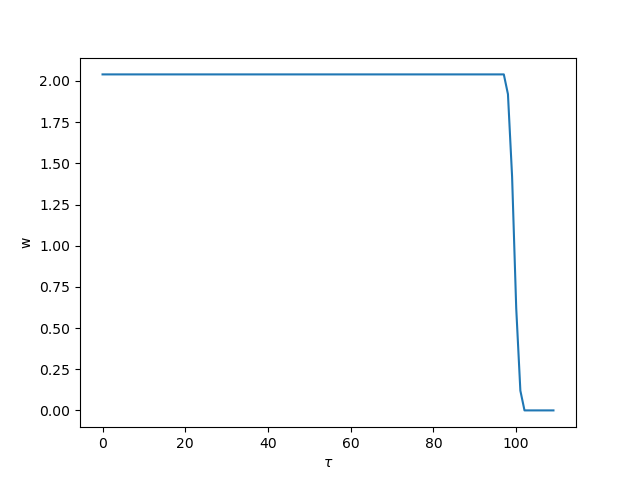

In [66]:
fig = plt.figure()
plt.plot(np.arange(len_w), np.flip(w))
plt.ylabel('w')
plt.xlabel(r'$\tau$')
plt.show()

In [67]:
def all_plot(time_steps, u, r, v, dv, TD):
    fig, axs = plt.subplots(5, sharex=True)
    fig.set_figwidth(10)
    fig.set_figheight(6)
    axs[0].plot(np.arange(time_steps), u[len_w:-1])
    axs[0].set(ylim=(0, 1.5))
    axs[0].set_ylabel('u')
    axs[1].plot(np.arange(time_steps), r)
    axs[1].set(ylim=(0, 2))
    axs[1].set_ylabel('r')
    axs[2].plot(np.arange(time_steps), v)
    #axs[2].set(ylim=(-1, 2.5))
    axs[2].set_ylabel('v')
    axs[3].plot(np.arange(time_steps), dv)
    #axs[3].set(ylim=(-1, 2.5))
    axs[3].set_ylabel('$\Delta v$')
    axs[4].plot(np.arange(time_steps), TD)
    #axs[4].set(ylim=(-1, 2.5))
    axs[4].set_ylabel('$\delta$')

    plt.show()
#plt.savefig('before.png')

<IPython.core.display.Javascript object>


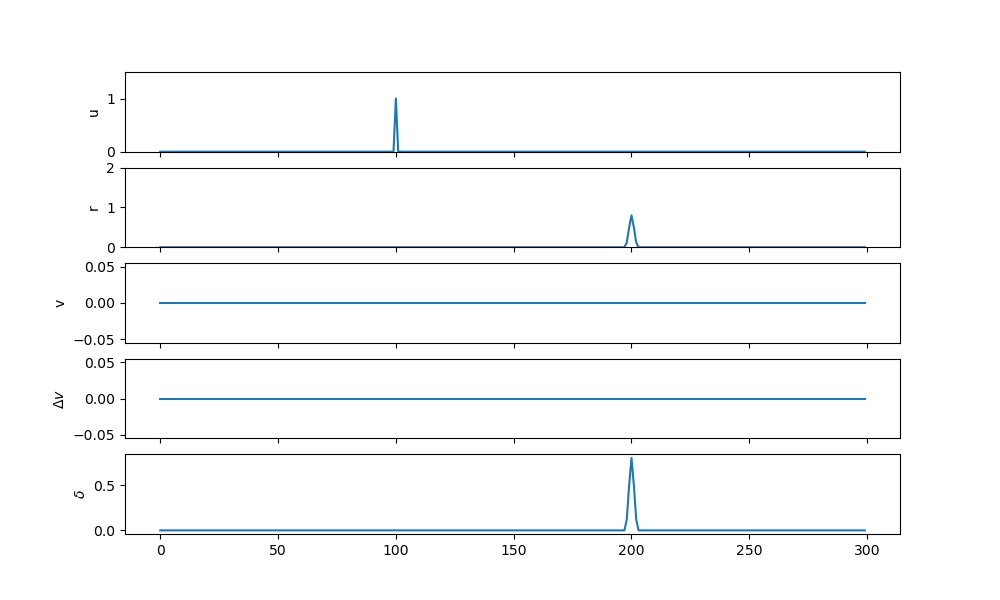

In [68]:
all_plot(time_steps, u, r, v[0], dv[0], TD[0])

<IPython.core.display.Javascript object>


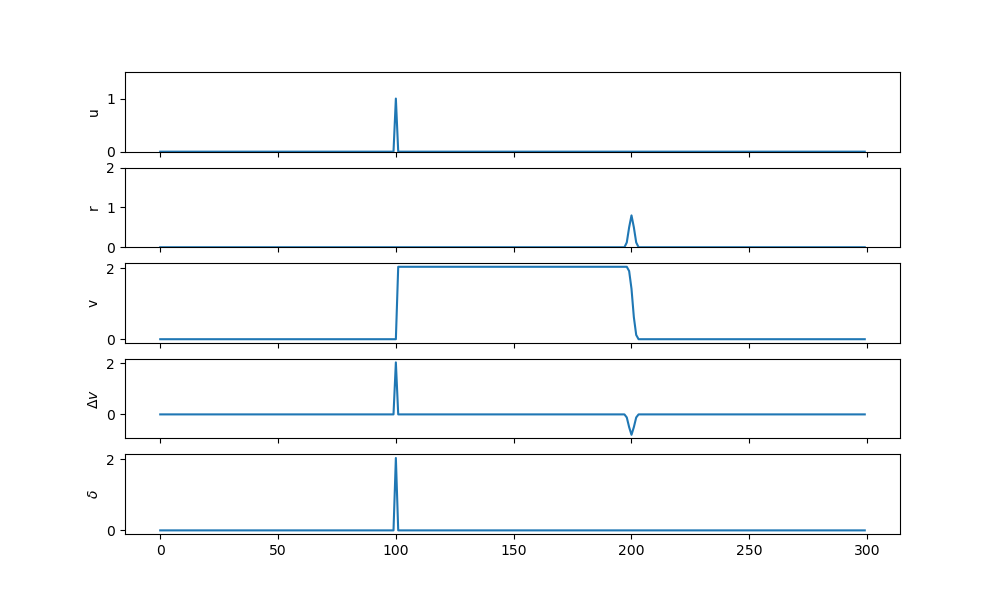

In [69]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

In [70]:
from matplotlib import cm
def TD_plot(time_steps, num_trials, TD):
    %matplotlib notebook
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(range(time_steps), range(num_trials))

    ax.plot_surface(Y, X, TD, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)
    ax.set_xlabel('Trials')
    ax.set_ylabel('Time')
    ax.set_zlabel('TD')
    plt.show()

<IPython.core.display.Javascript object>


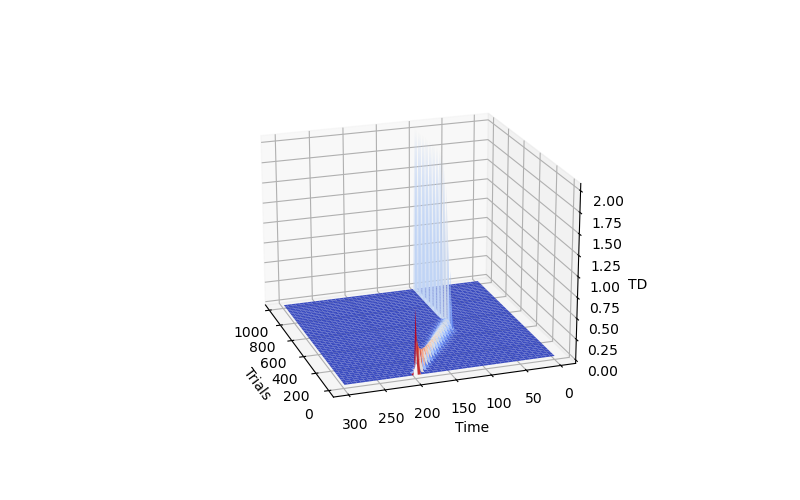

In [71]:
TD_plot(time_steps, num_trials, TD)

# Timing

In [72]:
lr =0.2
num_trials = 1000
time_steps = 300
len_w = 110
t_r = [150]
t_u = [100]
u, r, w, v, dv, TD = simulation(num_trials, time_steps, len_w, lr, t_r, t_u)

<IPython.core.display.Javascript object>


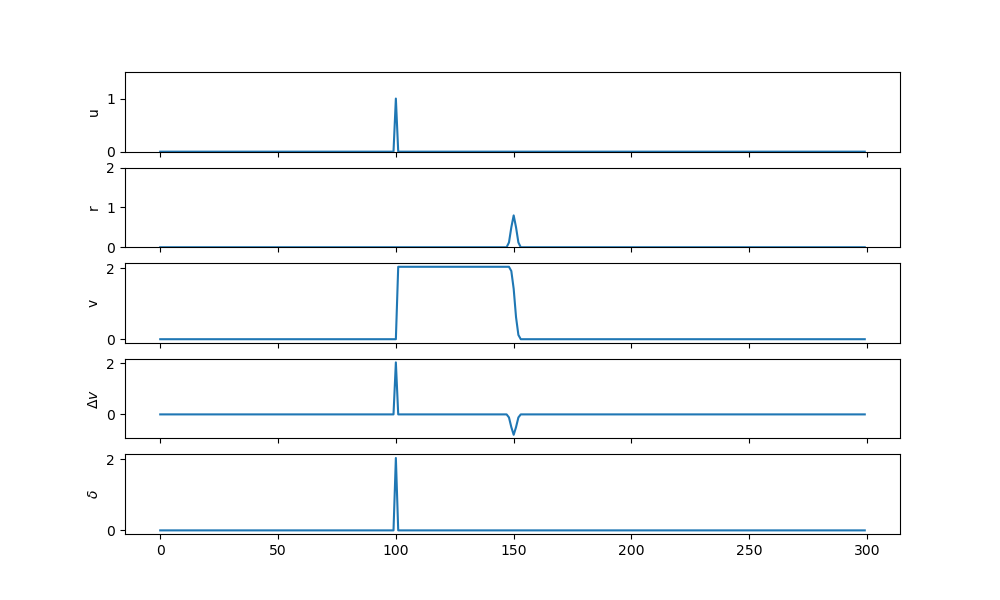

In [73]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

# Learning rate

In [74]:
LR = np.arange(0.1, 1.2, 0.1)
num_trials = 1400
time_steps = 300
len_w = 110
t_r = [200]
t_u = [100]
converge = []
for lr in LR:
    u, r, w, v, dv, TD = simulation(num_trials, time_steps, len_w, lr, t_r, t_u)
    for i in range(num_trials):
        if np.sum(TD[i, 101:]) <=0.01:
            converge.append(i)
            break
        elif i==num_trials-1:
            converge.append(i)

<IPython.core.display.Javascript object>


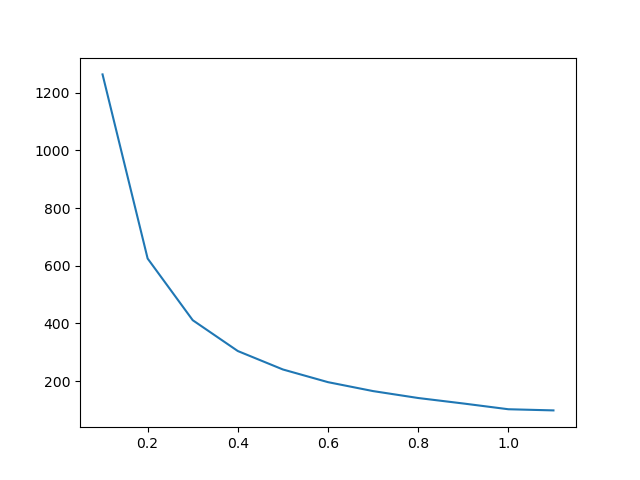

In [75]:
fig = plt.figure()
plt.plot(LR, converge)

<IPython.core.display.Javascript object>


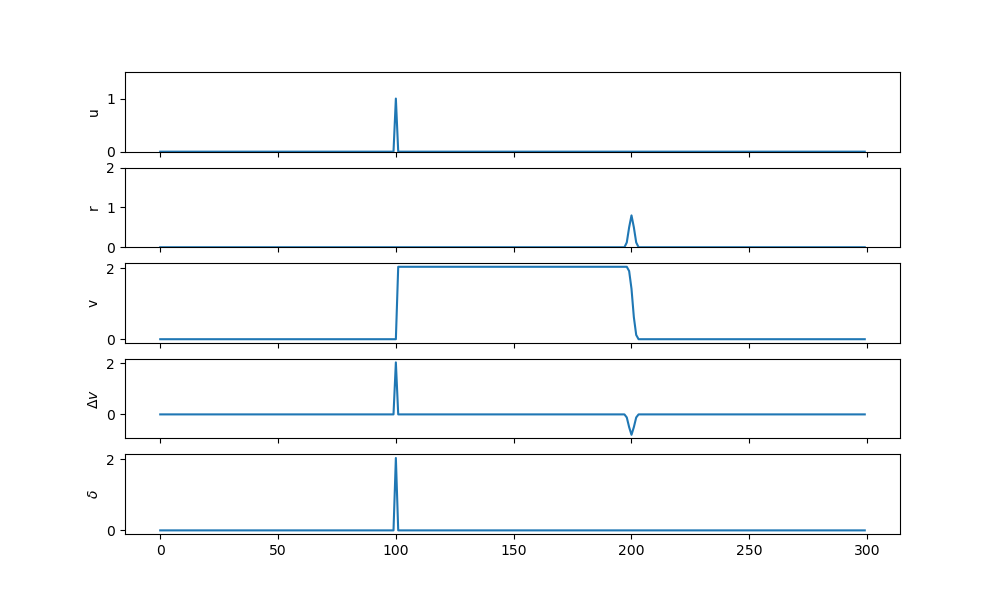

In [76]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

In [77]:
lr =1.201
num_trials = 2000
time_steps = 300
len_w = 110
t_r = [200]
t_u = [100]
u, r, w, v, dv, TD = simulation(num_trials, time_steps, len_w, lr, t_r, t_u)

<IPython.core.display.Javascript object>


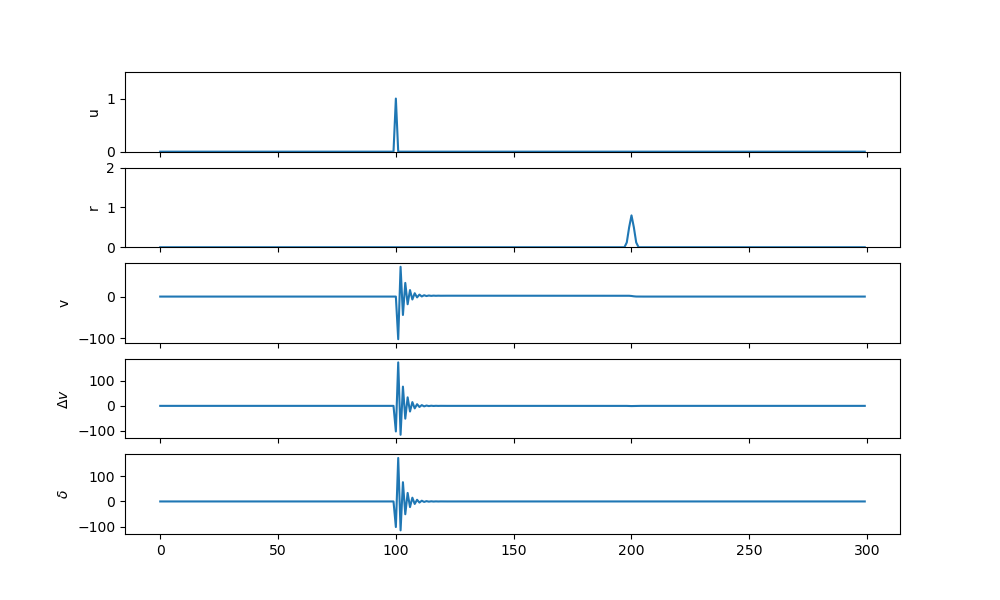

In [78]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

# Multiple rewards and cues

In [34]:
lr =0.2
num_trials = 1000
time_steps = 300
len_w = 110
t_r = [130, 160, 200]
t_u = [100]
u, r, w, v, dv, TD = simulation(num_trials, time_steps, len_w, lr, t_r, t_u)

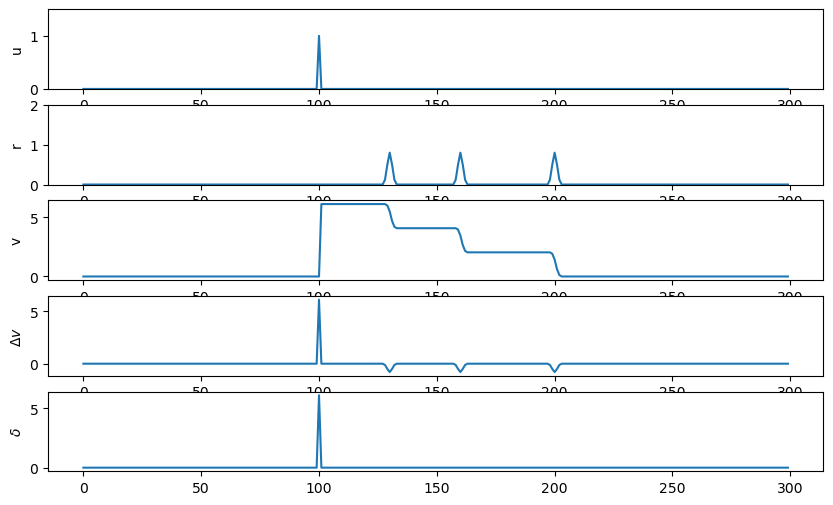

In [35]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

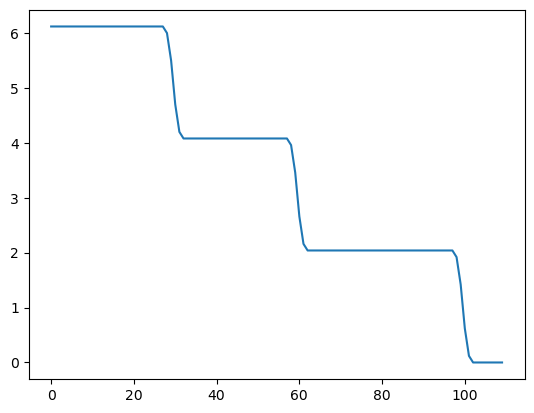

In [36]:
fig = plt.figure()
plt.plot(np.arange(len_w), np.flip(w))
plt.ylabel('w')
plt.xlabel(r'$\tau$')
plt.show()

<IPython.core.display.Javascript object>


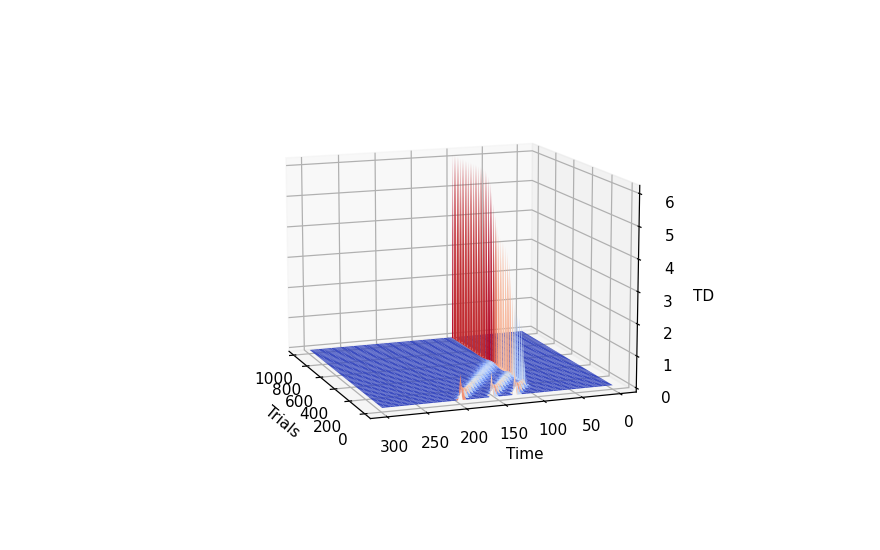

In [44]:
TD_plot(time_steps, num_trials, TD)

In [86]:
lr =0.2
num_trials = 1500
time_steps = 300
len_w = 110
t_r = [200]
t_u = [100, 150]
u, r, w, v, dv, TD = simulation(num_trials, time_steps, len_w, lr, t_r, t_u)

<IPython.core.display.Javascript object>


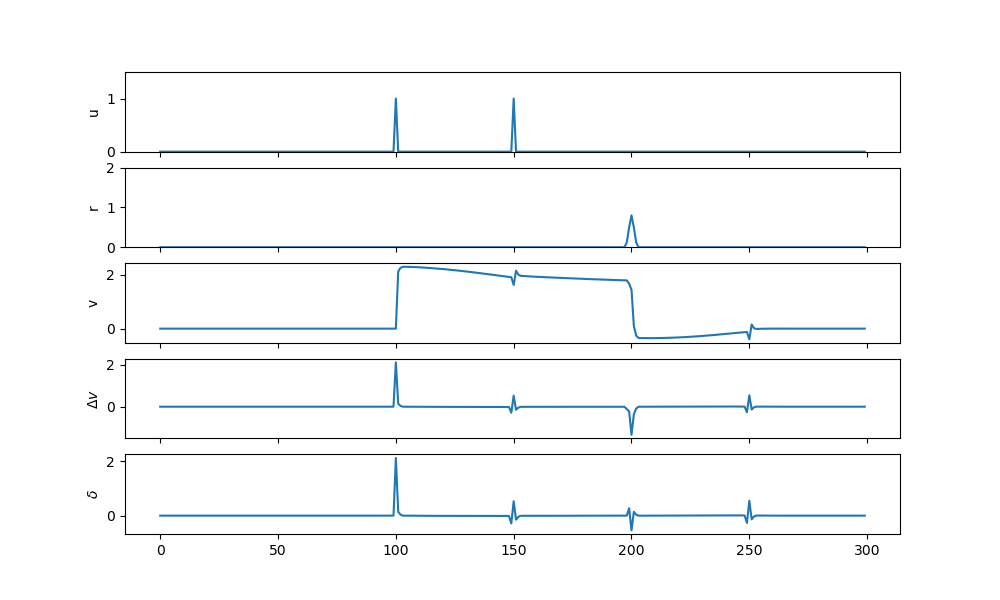

In [88]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

<IPython.core.display.Javascript object>


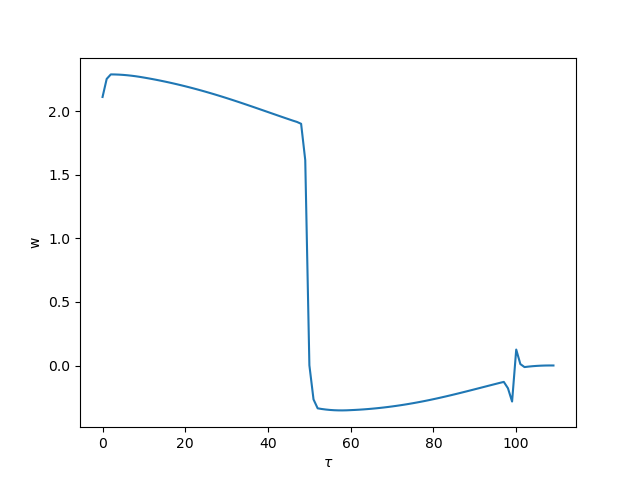

In [89]:
fig = plt.figure()
plt.plot(np.arange(len_w), np.flip(w))
plt.ylabel('w')
plt.xlabel(r'$\tau$')
plt.show()

<IPython.core.display.Javascript object>


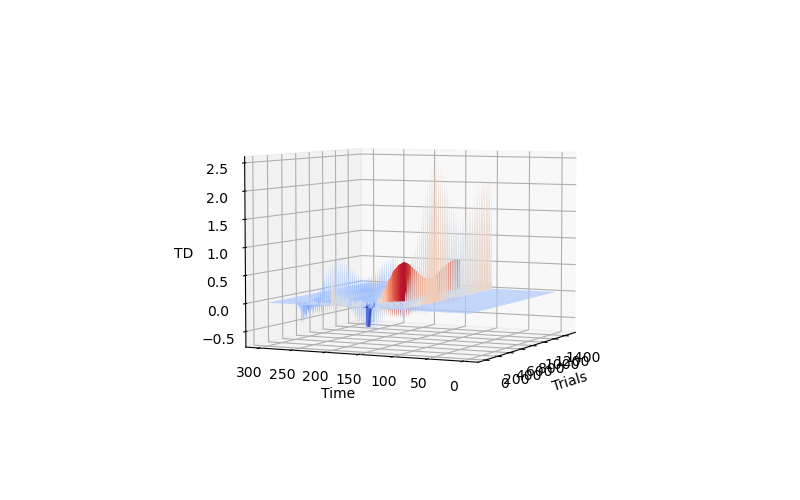

In [90]:
TD_plot(time_steps, num_trials, TD)

# Stochastic reward

In [79]:
def stochastic_simulation(num_trials, time_steps, len_w, lr, t_r, t_u, p, decay):
    u = np.zeros(time_steps + len_w + 1)   
    w = np.zeros(len_w)
    v = np.zeros((num_trials, time_steps))
    dv = np.zeros((num_trials, time_steps))
    TD = np.zeros((num_trials, time_steps))
    for t in t_u:
        u[t + len_w] = 1
    
        
    for i in range(num_trials):
        r = np.zeros(time_steps)
        for t in t_r:
            if np.random.rand() < p:
                r[t-2: t+3] =  [2 *0.06, 2 *0.25, 2 *0.40, 2 *0.25,  2 *0.06]       
        for t in range(time_steps):
            v[i, t] = cov(u, w, t)
            dv[i, t] =  cov(u, w, t+1) - v[i, t]
            TD[i, t] = dv[i, t] + r[t]
            w += lr * TD[i, t] * u[t: t+len_w]
        lr -= lr * decay
            
    return u, r, w, v, dv, TD

In [81]:
lr =0.2
num_trials = 2000
time_steps = 300
len_w = 110
t_r = [200]
t_u = [100]
p=0.5
u, r, w, v, dv, TD = stochastic_simulation(num_trials, time_steps, len_w, lr, t_r, t_u, p, 0)

<IPython.core.display.Javascript object>


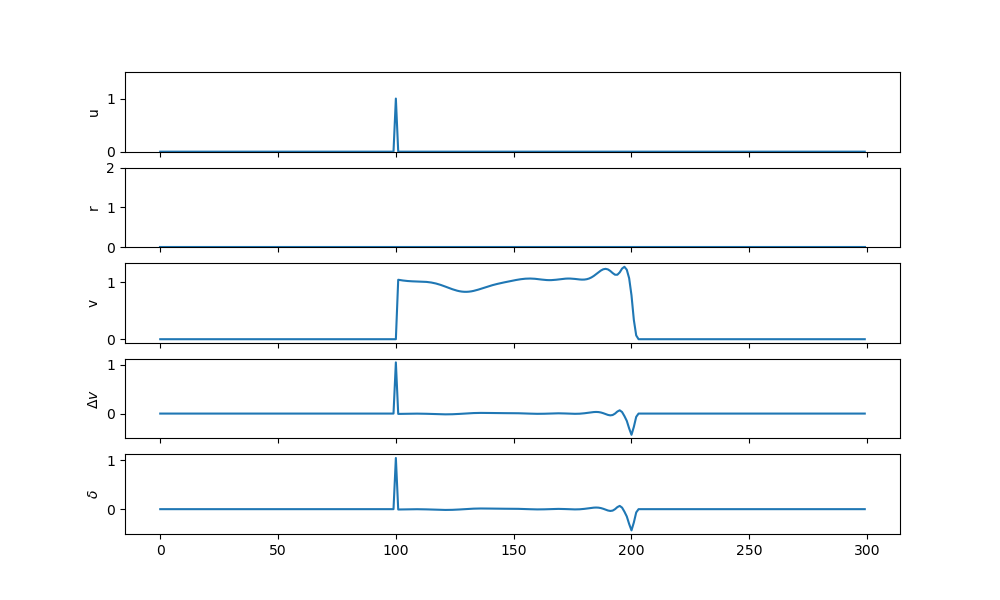

In [82]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

<IPython.core.display.Javascript object>


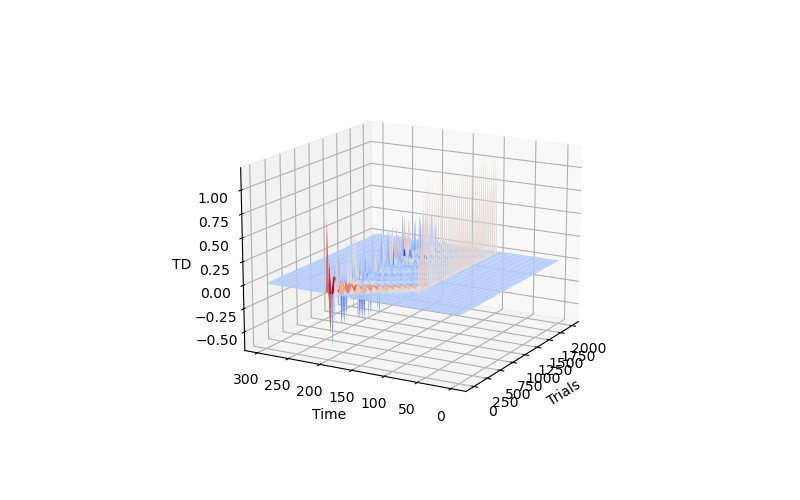

In [83]:
TD_plot(time_steps, num_trials, TD)

In [70]:
lr =0.2
num_trials = 2000
time_steps = 300
len_w = 110
t_r = [200]
t_u = [100]
p=0.5
u, r, w, v, dv, TD = stochastic_simulation(num_trials, time_steps, len_w, lr, t_r, t_u, p, 1e-3)

<IPython.core.display.Javascript object>


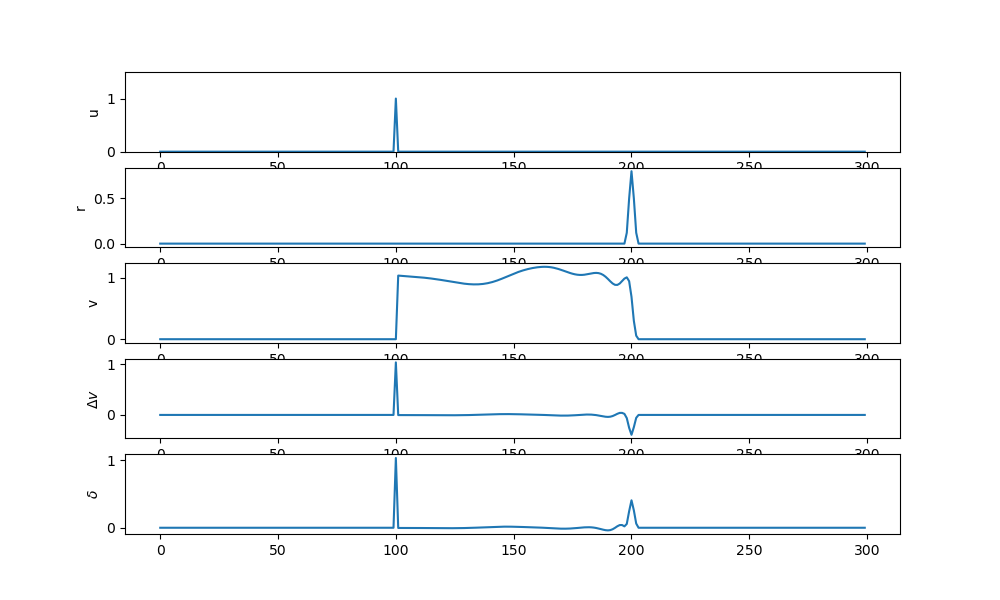

In [71]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])

<IPython.core.display.Javascript object>


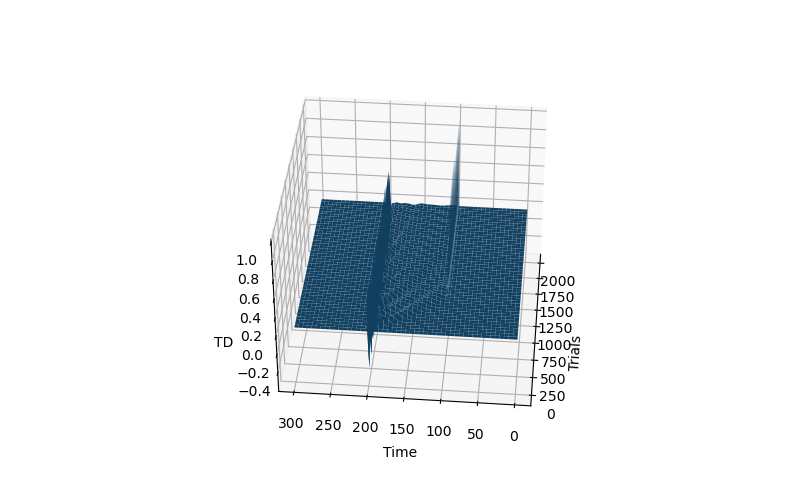

In [67]:
TD_plot(time_steps, num_trials, TD)

In [48]:
lr =0.2
num_trials = 1500
time_steps = 300
len_w = 110
t_r = [180, 200]
t_u = [100]
p=0.5
u, r, w, v, dv, TD = stochastic_simulation(num_trials, time_steps, len_w, lr, t_r, t_u, p)

<IPython.core.display.Javascript object>


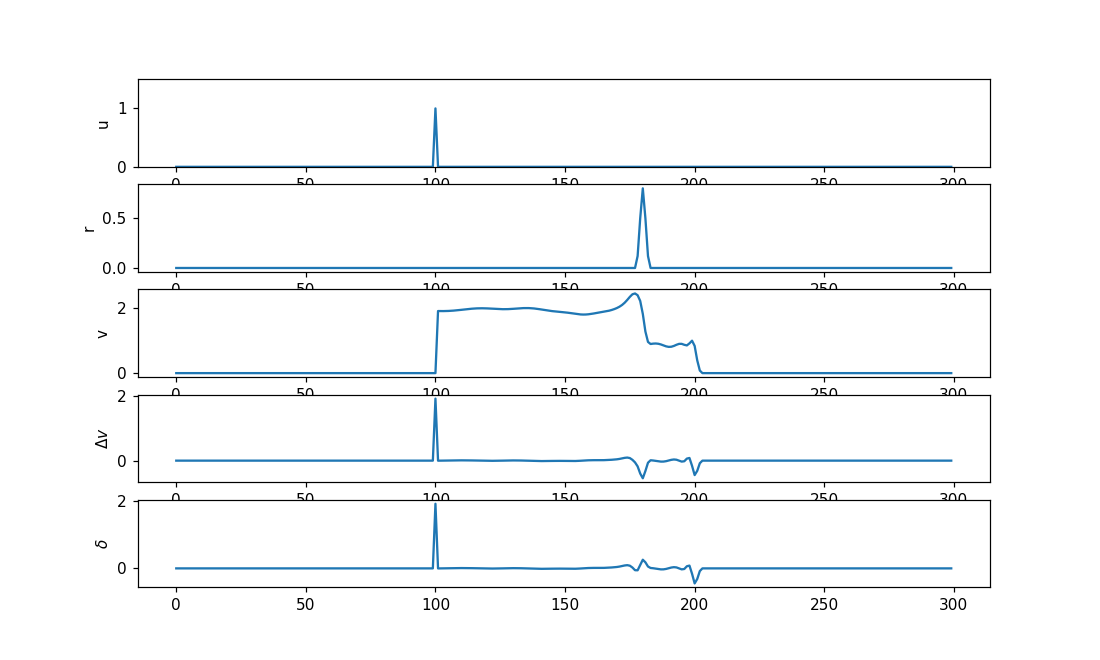

In [49]:
all_plot(time_steps, u, r, v[-1], dv[-1], TD[-1])